###Ahmad Aljarf
###Prediction using Decision Tree Algorithm
###LetsGrowMore
###Batch: January 2023

first lets upload the dataset file

In [7]:

from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


Lets import the required libraries

In [359]:
import pandas as pd
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Iris.csv']), index_col=False)
df1.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


now lets pepare the data

In [360]:
columns = df1[['Id','SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm'	]]
features=columns
print(features)
y=df1['Species'] # the lables will be kept as categories
print(y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

importing the model

In [361]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()


In [362]:
# splitting the data and choosing X and y for the test and training

X = features# attributes (inputs)  
y  # labels (outputs)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

Visualizing the decision tree for a better understanding of the concept

[Text(0.4, 0.8333333333333334, 'X[0] <= 50.5\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 100.5\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]')]

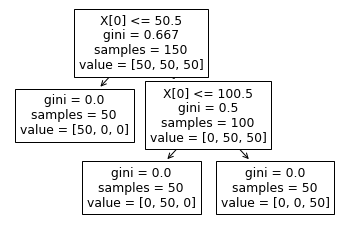

In [363]:
from pandas.core.internals.managers import defaultdict
from sklearn import tree

dtc = dtree.fit(features, y) # fitting the model for the visualization
tree.plot_tree(dtc)

In [364]:
text_representation = tree.export_text(dtree) # here a text representation
print(text_representation)

|--- feature_0 <= 50.50
|   |--- class: Iris-setosa
|--- feature_0 >  50.50
|   |--- feature_0 <= 100.50
|   |   |--- class: Iris-versicolor
|   |--- feature_0 >  100.50
|   |   |--- class: Iris-virginica



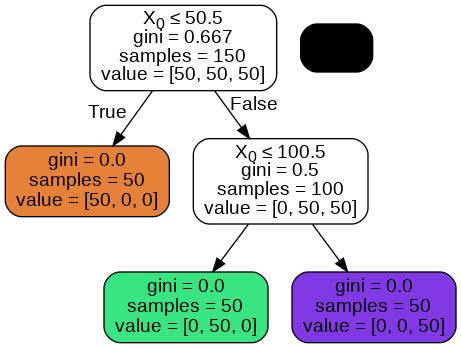

In [365]:
from six import StringIO              # here is a different plotting style using export graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

now lets assign X and y varaibles using the data values

In [366]:

X=features.values
y2=y.values

now splitting the data into training and testing set

In [367]:

# splitting the data to training and testing set
from sklearn.model_selection import train_test_split   # test size is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=0)

In [371]:
dtc2= dtree.fit(X, y2) # fitting the model for predictions

In [372]:
y_pred = dtc2.predict(X_test) # lets make the predictions
y_pred
     
     

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [373]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })  # lets compare the actual values with the predicted values
df_pred

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


Now evaluation metrics will be applied to evaluate the model's performance :

Accuracy score:

It is calculated as the number of correct predictions as a percentage of the number of observations in the dataset.

In [375]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) # the is 100% , it show that the model peformed very well
print("The accuracy of prediction is: ", accuracy)
     

The accuracy of prediction is:  1.0


Precision:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0


In [378]:
from sklearn.metrics import precision_score # it shows that the model perofrmed well
precision_score(y_test, y_pred, average='micro')
     

1.0

Recall:

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples

In [379]:
from sklearn.metrics import recall_score        # micro average is used for a balanced dataset
recall_score(y_test, y_pred, average='micro')   # it shows that the model perofrmed well

1.0

F1-score:

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

In [381]:
from sklearn.metrics import f1_score  # it shows that the model perofrmed well

f1_score(y_test, y_pred , average='micro')

1.0

Confusion matrix:

is a process that helps to assess and predict the validity of a classification model. Using confusion matrices allows you to see different errors which you could make when you make predictions. This allows you to gain more information about how to better use machine learning, analyzing the difference between classified and misclassified data.

In [382]:

y_test = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')

#create confusion matrix
print(pd.crosstab(y_test, y_pred))

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               11                0               0
Iris-versicolor            0               13               0
Iris-virginica             0                0               6


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


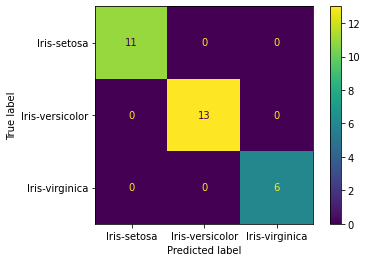

In [384]:

import matplotlib.pyplot as plt 

from sklearn.metrics import plot_confusion_matrix # here is the plot of the confusion matrix for a better understanding 

plot_confusion_matrix(dtc,X_test,y_test)

plt.show()
     